In [2]:
import numpy as np 
import glob

root_dir = "/data/amathur-23/DADA/models/mid_fusion"

files = glob.glob(root_dir + "/*_embeddings.npz")

print(files)

['/data/amathur-23/DADA/models/mid_fusion/asvspoof21_embeddings.npz', '/data/amathur-23/DADA/models/mid_fusion/inthewild_embeddings.npz', '/data/amathur-23/DADA/models/mid_fusion/asvspoof19_embeddings.npz', '/data/amathur-23/DADA/models/mid_fusion/mlaad_en_embeddings.npz']


In [ ]:
embeddings_dict = {}

for file_path in files:
    data = np.load(file_path)
    dataset = file_path.split("/")[-1].split("_")[0]
    # Access the embeddings and labels
    text_embeddings = data['text']
    speech_embeddings = data['speech']
    labels = data['labels']

    # Print the shapes of the loaded arrays
    print(f"Dataset: {dataset}")    
    print(f"\tText Embeddings Shape: {text_embeddings.shape}")
    print(f"\tSpeech Embeddings Shape: {speech_embeddings.shape}")
    print(f"\tLabels Shape: {labels.shape}")

    embeddings_dict[dataset] = {
        'text': text_embeddings,
        'speech': speech_embeddings,
        'labels': labels
    }

Dataset: asvspoof21
Text Embeddings Shape: (8716, 512)
Speech Embeddings Shape: (8716, 256)
Labels Shape: (8716,)
Dataset: inthewild
Text Embeddings Shape: (43776, 512)
Speech Embeddings Shape: (43776, 256)
Labels Shape: (43776,)
Dataset: asvspoof19
Text Embeddings Shape: (6355, 512)
Speech Embeddings Shape: (6355, 256)
Labels Shape: (6355,)
Dataset: mlaad
Text Embeddings Shape: (6000, 512)
Speech Embeddings Shape: (6000, 256)
Labels Shape: (6000,)


In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to plot t-SNE
def plot_tsne(embeddings, labels, ax, title, max_samples=5000):
    # Randomly sample the data to plot
    if embeddings.shape[0] > max_samples:
        sample_idxs = np.random.choice(embeddings.shape[0], max_samples, replace=False)
        embeddings = embeddings[sample_idxs]
        labels = labels[sample_idxs]

    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(embeddings)
    
    scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.7)
    ax.set_title(title)
    return scatter

In [22]:
def visualise_embeddings(embeddings_dict, modality='speech', max_samples = 5000):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()

    for i, (dataset, data) in enumerate(embeddings_dict.items()):
        speech_embeddings = data[modality]
        labels = data['labels']
        scatter = plot_tsne(speech_embeddings, labels, axes[i], f'{dataset}', max_samples=max_samples)

    legend_labels = {0: 'spoof', 1: 'bonafide'}
    handles, _ = scatter.legend_elements()
    legend = fig.legend(handles, [legend_labels[int(label)] for label in np.unique(labels)], loc='upper right', title='Labels')

    fig.suptitle(f't-SNE Visualization of {modality} Embeddings')

    plt.tight_layout()
    plt.show()

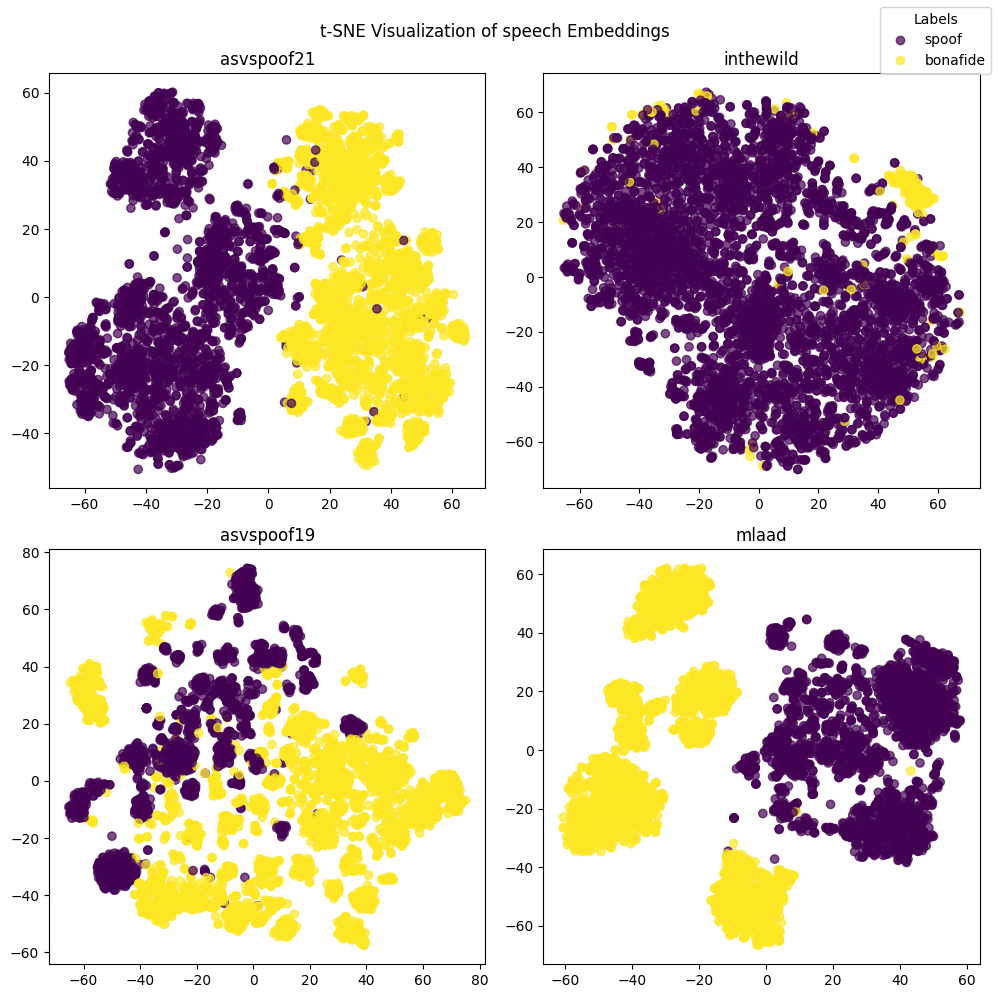

In [23]:
visualise_embeddings(embeddings_dict, modality='speech', max_samples = 5000)

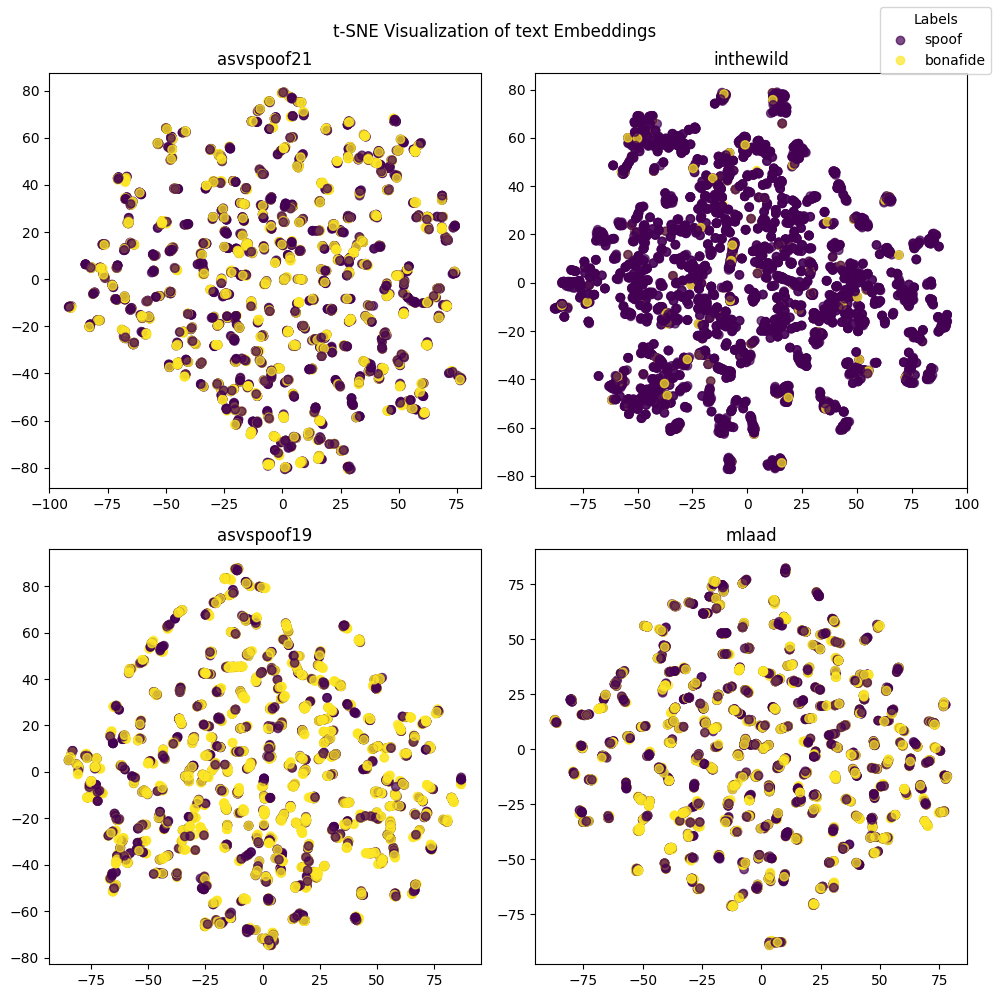

In [24]:
visualise_embeddings(embeddings_dict, modality='text', max_samples = 5000)